In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
sc = MinMaxScaler(feature_range = (0, 1))

dataset = pd.read_csv("../data/database.txt")

In [3]:
dataset.head()


,0,1,2,3,4,5,6,7,8,9,...,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120
0,-0.231419,-0.105345,-0.056855,-0.376890,-0.347796,-0.173231,0.301972,0.777175,1.000230,0.777175,...,-0.609642,-0.599944,-0.599944,-0.599944,-0.609642,-0.629038,-0.609642,-0.590246,-0.590246,0
1,0.010662,0.216768,0.770678,0.796442,0.835086,0.886613,0.654744,0.474401,0.371348,0.899495,...,-0.504603,-0.504603,-0.530366,-0.530366,-0.556130,-0.530366,-0.517485,-0.504603,-0.504603,0
2,-0.471415,-0.460052,-0.448690,-0.448690,-0.437327,-0.380512,-0.369150,-0.414601,-0.425964,-0.335061,...,-0.562318,-0.562318,-0.539592,-0.528229,-0.528229,-0.528229,-0.550955,-0.539592,-0.539592,0
3,-0.329885,-0.250811,-0.231043,-0.280464,-0.339769,-0.161854,-0.063012,0.174208,0.055598,0.144556,...,-0.576990,-0.586874,-0.596758,-0.596758,-0.596758,-0.576990,-0.576990,-0.567105,-0.576990,0
4,-0.456940,-0.340782,-0.311743,-0.263344,-0.369822,-0.437581,-0.427901,-0.321423,-0.273023,-0.118146,...,-0.602138,-0.631177,-0.611818,-0.602138,-0.582778,-0.573098,-0.573098,-0.563418,-0.582778,0


In [4]:
size = len(dataset)
size

2012

In [5]:
length = len(dataset.iloc[0].tolist())
length

1121

In [6]:
lensensor = (length - 1 )/8

In [7]:
def meanValue(inp):
    mean = 0
    length = len(inp)
    for i in inp:
        mean += i
    mean /= length
    return mean

In [8]:
dataset_train = []

for row in [np.array(dataset.iloc[j].tolist()) for j in range(size)]:
    newrow = []
    label = row[length-1]
    row = row[:length-1]# - row.min()
    for i in range(8):
        newrow.append(meanValue(row[i*140:i*140+140]))
    newrow.append(int(label))
    dataset_train.append(newrow)  

In [9]:
dataset.isna()

,0,1,2,3,4,5,6,7,8,9,...,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2008,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2009,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2010,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
dataset_train = np.array(dataset_train)
dataset_train = dataset_train[np.random.permutation(len(dataset_train))]
X_train = dataset_train[:,:-1]
Y_train = dataset_train[:,-1:]

In [11]:
X_train.shape

(2012, 8)

In [12]:
Y_train = [int(i) for i in Y_train]


In [13]:
Y_train = np.eye(np.max(Y_train) + 1)[Y_train]

In [14]:
X_train.shape

(2012, 8)

In [15]:
Y_train.shape

(2012, 5)

In [16]:
model = Sequential()

model.add(Dense(8, input_shape=(8,)))
model.add(Dropout(0.3))

model.add(Dense(16))
model.add(Dropout(0.3))

model.add(Dense(units = 5, activation="softmax"))

In [17]:
mcp_save = ModelCheckpoint("../Data/workligth_.h5", save_best_only=True, monitor='val_acc', mode='max')

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, Y_train,validation_split=0.2, epochs = 150, batch_size = 8, verbose=2,callbacks=[mcp_save])

Train on 1609 samples, validate on 403 samples
Epoch 1/150
 - 0s - loss: 0.4378 - accuracy: 0.8096 - val_loss: 0.3340 - val_accuracy: 0.8744
Epoch 2/150
 - 0s - loss: 0.3189 - accuracy: 0.8671 - val_loss: 0.2536 - val_accuracy: 0.9275


C:\Users\Denis\Anaconda3\envs\myo\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 3/150
 - 0s - loss: 0.2746 - accuracy: 0.8853 - val_loss: 0.2082 - val_accuracy: 0.9365
Epoch 4/150
 - 0s - loss: 0.2380 - accuracy: 0.9019 - val_loss: 0.1752 - val_accuracy: 0.9400
Epoch 5/150
 - 0s - loss: 0.2079 - accuracy: 0.9139 - val_loss: 0.1487 - val_accuracy: 0.9385
Epoch 6/150
 - 0s - loss: 0.1987 - accuracy: 0.9161 - val_loss: 0.1329 - val_accuracy: 0.9434
Epoch 7/150
 - 0s - loss: 0.1879 - accuracy: 0.9200 - val_loss: 0.1236 - val_accuracy: 0.9494
Epoch 8/150
 - 0s - loss: 0.1699 - accuracy: 0.9248 - val_loss: 0.1158 - val_accuracy: 0.9474
Epoch 9/150
 - 0s - loss: 0.1664 - accuracy: 0.9241 - val_loss: 0.1092 - val_accuracy: 0.9494
Epoch 10/150
 - 0s - loss: 0.1703 - accuracy: 0.9227 - val_loss: 0.1040 - val_accuracy: 0.9533
Epoch 11/150
 - 0s - loss: 0.1590 - accuracy: 0.9290 - val_loss: 0.0991 - val_accuracy: 0.9578
Epoch 12/150
 - 0s - loss: 0.1481 - accuracy: 0.9344 - val_loss: 0.0961 - val_accuracy: 0.9563
Epoch 13/150
 - 0s - loss: 0.1433 - accuracy: 0.9372 - va

Epoch 90/150
 - 0s - loss: 0.1018 - accuracy: 0.9567 - val_loss: 0.0617 - val_accuracy: 0.9737
Epoch 91/150
 - 0s - loss: 0.1004 - accuracy: 0.9581 - val_loss: 0.0601 - val_accuracy: 0.9767
Epoch 92/150
 - 0s - loss: 0.1057 - accuracy: 0.9565 - val_loss: 0.0625 - val_accuracy: 0.9732
Epoch 93/150
 - 0s - loss: 0.1001 - accuracy: 0.9576 - val_loss: 0.0599 - val_accuracy: 0.9782
Epoch 94/150
 - 0s - loss: 0.1036 - accuracy: 0.9579 - val_loss: 0.0598 - val_accuracy: 0.9752
Epoch 95/150
 - 0s - loss: 0.1034 - accuracy: 0.9576 - val_loss: 0.0627 - val_accuracy: 0.9732
Epoch 96/150
 - 0s - loss: 0.1034 - accuracy: 0.9580 - val_loss: 0.0611 - val_accuracy: 0.9737
Epoch 97/150
 - 0s - loss: 0.1008 - accuracy: 0.9585 - val_loss: 0.0591 - val_accuracy: 0.9762
Epoch 98/150
 - 0s - loss: 0.1029 - accuracy: 0.9559 - val_loss: 0.0578 - val_accuracy: 0.9762
Epoch 99/150
 - 0s - loss: 0.0980 - accuracy: 0.9611 - val_loss: 0.0612 - val_accuracy: 0.9727
Epoch 100/150
 - 0s - loss: 0.1037 - accuracy: 0.9

In [19]:
pd.DataFrame.from_dict(history.history).to_csv('historyPCsmall.csv',index=False)

KeyError: 'acc'

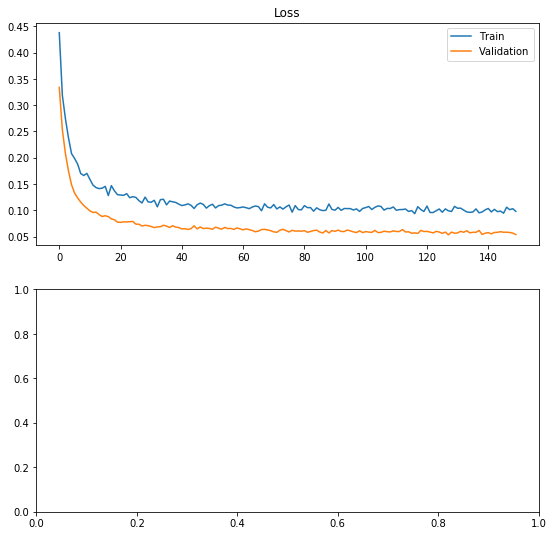

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Train","Validation"])
plt.title("Loss")
plt.subplot(2,1,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(["Train","Validation"])
plt.title("Accuracy")

In [130]:
model.save("../Data/ligth.h5")
print("Saved model to disk")

Saved model to disk


In [131]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph

In [132]:
from keras.models import load_model
from keras import backend as K

import tensorflow as tf
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

In [133]:
model = load_model('../Data/ligth.h5')

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [134]:
model.outputs

[<tf.Tensor 'dense_22_1/Softmax:0' shape=(?, 5) dtype=float32>]

In [135]:
model.inputs

[<tf.Tensor 'dense_20_input_1:0' shape=(?, 8) dtype=float32>]

In [136]:
frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])

INFO:tensorflow:Froze 191 variables.
Converted 191 variables to const ops.


In [137]:
tf.train.write_graph(frozen_graph, "../Models", "ligth.pb", as_text=False)

'../Models\\ligth.pb'

In [138]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_9 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 45        
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________
None
